In this part, you will implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices.
The file `ex1data2.txt` contains a training set of housing prices in Portland, Oregon. 

- The first column is `the size of the house` (in square feet)
- the second column is `the number of bedrooms`
- the third column is `the price of the house`

[†] computeCostMulti.m - Cost function for multiple variables

[†] gradientDescentMulti.m - Gradient descent for multiple variables

[†] featureNormalize.m - Function to normalize features

[†] normalEqn.m - Function to compute the normal equations

# readDataFile

In [3]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/ex1data2.txt', header = None, names=['house_size', 'bedrooms_number', 'house_price'])
x_data = np.array([np.array(data.house_size), np.array(data.bedrooms_number)])
y_data = np.array(data.house_price)
x_data, y_data

(array([[2104, 1600, 2400, 1416, 3000, 1985, 1534, 1427, 1380, 1494, 1940,
         2000, 1890, 4478, 1268, 2300, 1320, 1236, 2609, 3031, 1767, 1888,
         1604, 1962, 3890, 1100, 1458, 2526, 2200, 2637, 1839, 1000, 2040,
         3137, 1811, 1437, 1239, 2132, 4215, 2162, 1664, 2238, 2567, 1200,
          852, 1852, 1203],
        [   3,    3,    3,    2,    4,    4,    3,    3,    3,    3,    4,
            3,    3,    5,    3,    4,    2,    3,    4,    4,    3,    2,
            3,    4,    3,    3,    3,    3,    3,    3,    2,    1,    4,
            3,    4,    3,    3,    4,    4,    4,    2,    3,    4,    3,
            2,    4,    3]]),
 array([399900, 329900, 369000, 232000, 539900, 299900, 314900, 198999,
        212000, 242500, 239999, 347000, 329999, 699900, 259900, 449900,
        299900, 199900, 499998, 599000, 252900, 255000, 242900, 259900,
        573900, 249900, 464500, 469000, 475000, 299900, 349900, 169900,
        314900, 579900, 285900, 249900, 229900, 345000

# plotData

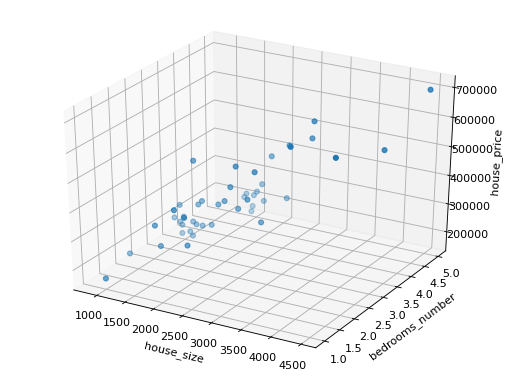

In [4]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义坐标轴
fig = plt.figure(figsize=(8,6), dpi=80)
ax1 = plt.axes(projection='3d')

# 三维散点图
ax1.scatter3D(x_data[0], x_data[1], y_data, cmap='Blues')
ax1.set_xlabel('house_size')
ax1.set_ylabel('bedrooms_number')
ax1.set_zlabel('house_price')
plt.show()

# Feature Normaliztion

In [5]:
def featureNorm():
  new_x = []
  for i in range(len(x_data)):
    si = x_data[i].max() - x_data[i].min()
    avgi = x_data[i].mean()
    tmp = []
    for j in range(len(x_data[i])):
      ret = (x_data[i][j] - avgi) / si
      tmp.append(ret)
    new_x.append(tmp)
  return np.array(new_x)

new_x_data = featureNorm()
new_x_data

array([[ 2.84939738e-02, -1.10502165e-01,  1.10126627e-01,
        -1.61246787e-01,  2.75598221e-01, -4.32455904e-03,
        -1.28704041e-01, -1.58213141e-01, -1.71175083e-01,
        -1.39735480e-01, -1.67349286e-02, -1.87769185e-04,
        -3.05242281e-02,  6.83209914e-01, -2.02063114e-01,
         8.25480278e-02, -1.87722242e-01, -2.10888266e-01,
         1.67765899e-01,  2.84147587e-01, -6.44459049e-02,
        -3.10758001e-02, -1.09399021e-01, -1.06676368e-02,
         5.21047752e-01, -2.48395160e-01, -1.49663776e-01,
         1.44875662e-01,  5.49694288e-02,  1.75487906e-01,
        -4.45893136e-02, -2.75973759e-01,  1.08436704e-02,
         3.13380902e-01, -5.23113213e-02, -1.55455282e-01,
        -2.10060908e-01,  3.62159815e-02,  6.10678199e-01,
         4.44895612e-02, -9.28518618e-02,  6.54492965e-02,
         1.56182887e-01, -2.20816561e-01, -3.16790086e-01,
        -4.10040957e-02, -2.19989203e-01],
       [-4.25531915e-02, -4.25531915e-02, -4.25531915e-02,
        -2.92

# computeCostMulti

In [6]:
theta = np.zeros(len(x_data) + 1)

def computeCostMulti(x_data, y_data, theta):
  sum = 0.0
  for i in range(len(y_data)):
    x = []
    x.append(1)
    for j in range(len(x_data)):
      x.append(x_data[j][i])
    x = np.array(x)
    # print(x)
    sum += (np.dot(theta, x.T) - y_data[i]) ** 2
  return (1 / (2 * len(y_data))) * sum

computeCostMulti(x_data, y_data, theta) # 未特征缩放
# computeCostMulti(new_x_data, y_data, theta) # 特征缩放

65591548106.45744

# gradientDescentMulti

iterator: 1, CostMulti: 7043820861.957795
theta:  [340412.65957447  22932.16732519   9772.75269149]
iterator: 2, CostMulti: 6508557532.915962
theta:  [340412.65957447  44562.91458633  18705.0287936 ]
iterator: 3, CostMulti: 6036555063.809312
theta:  [340412.65957447  64972.63089917  26854.50305097]
iterator: 4, CostMulti: 5620087665.253171
theta:  [340412.65957447  84236.60813487  34275.08665256]
iterator: 5, CostMulti: 5252382739.523759
theta:  [340412.65957447 102425.36655696  41017.16958714]
iterator: 6, CostMulti: 4927502895.157203
theta:  [340412.65957447 119604.959611    47127.84744896]
iterator: 7, CostMulti: 4640242582.171803
theta:  [340412.65957447 135837.25920254  52651.1336902 ]
iterator: 8, CostMulti: 4386037535.325530
theta:  [340412.65957447 151180.22271322  57628.15825299]
iterator: 9, CostMulti: 4160885437.583516
theta:  [340412.65957447 165688.14292464  62097.3534542 ]
iterator: 10, CostMulti: 3961276412.859184
theta:  [340412.65957447 179411.88194501  66094.62793994]

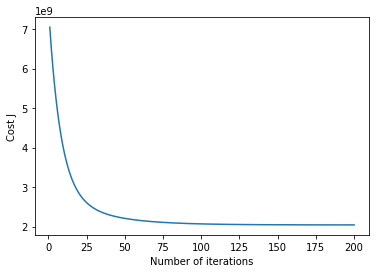

array([340412.65957447, 499218.78651958, -27856.69805175])

In [32]:
learning_rate = 0.3
iterator_num = 200
theta = np.zeros(len(x_data) + 1)

def gradientDescentMulti(x_data, y_data, theta):
  tmp = []
  for iterator in range(1, iterator_num + 1):
    for j in range(len(x_data) + 1): # 遍历theta
      sum = 0.0
      for i in range(len(y_data)):
        x = []
        x.append(1)
        for k in range(len(x_data)):
          x.append(x_data[k][i])
        x = np.array(x)
        sum += (np.dot(theta, x.T) - y_data[i]) * x[j]
      theta[j] -= (1 / len(y_data)) * sum
    print("iterator: %d, CostMulti: %f"% (iterator, computeCostMulti(x_data, y_data, theta)))
    print("theta: ", theta)
    tmp.append(computeCostMulti(x_data, y_data, theta))
  plt.plot(range(1, iterator_num + 1), tmp)
  plt.ticklabel_format(style='sci',scilimits=(0,0),axis='y')
  plt.xlabel("Number of iterations")
  plt.ylabel("Cost J")
  plt.show()
  return theta

gradientDescentMulti(new_x_data, y_data, theta)

# Normal Equations

In [31]:
# test = np.array([[1,2,3],[4,5,6]])
# np.dot(test, test.T)

def NormalEquations(x_data, y_data, theta):
  X = []
  
  for i in range(len(y_data)):
    tempx = []
    for j in range(len(theta)):
      if j == 0:
        tempx.append(1)
      else:
        tempx.append(x_data[j - 1][i])
    X.append(tempx)
  X = np.array(X)
  # print(np.array(X).shape)
  # theta = np.dot(np.dot(np.dot(X.T, X), X.T), y_data)
  theta = X.T@X@X.T@y_data
  print(theta)

NormalEquations(new_x_data, y_data, theta)

[7.51971565e+08 2.90128950e+06 1.96331254e+06]
